In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b92f45b49ee20d49d94ae33601d90d6


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | antofagasta
Processing Record 5 of Set 1 | pedernales
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | hearst
Processing Record 9 of Set 1 | ewa beach
Processing Record 10 of Set 1 | saurimo
Processing Record 11 of Set 1 | ures
Processing Record 12 of Set 1 | harper
Processing Record 13 of Set 1 | roblin
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | svetlyy
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | umm lajj
Processing Record 18 of Set 1 | ushibuka
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | severo-kurilsk
Processing Record 22 of Set 1 | vaini
Proce

Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | sovetskiy
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | bundaberg
Processing Record 46 of Set 4 | kajaani
Processing Record 47 of Set 4 | caldwell
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | juba
Processing Record 50 of Set 4 | tabou
Processing Record 1 of Set 5 | ushtobe
Processing Record 2 of Set 5 | hauterive
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | seydi
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | tautira
Processing Record 8 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 5 | camana
Processing Record 10 of Set 5 | roma
Processing Record 11 of Set 5 | veraval
Processing Record 12 of Set 5 | tol

City not found. Skipping...
Processing Record 31 of Set 8 | kiruna
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | dohrighat
Processing Record 34 of Set 8 | qianan
Processing Record 35 of Set 8 | tuy hoa
Processing Record 36 of Set 8 | gao
Processing Record 37 of Set 8 | barretos
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | port blair
Processing Record 40 of Set 8 | oum hadjer
Processing Record 41 of Set 8 | skerries
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | solikamsk
Processing Record 44 of Set 8 | akdepe
Processing Record 45 of Set 8 | longlac
City not found. Skipping...
Processing Record 46 of Set 8 | awjilah
Processing Record 47 of Set 8 | wagar
Processing Record 48 of Set 8 | levelland
Processing Record 49 of Set 8 | arlit
Processing Record 50 of Set 8 | sapulpa
Processing Record 1 of Set 9 | srikakulam
Processing Record 2 of Set 9 | mullaitivu
City not found. Skipping...
Processing Record 3 of S

Processing Record 16 of Set 12 | charters towers
Processing Record 17 of Set 12 | pregradnoye
Processing Record 18 of Set 12 | tornio
Processing Record 19 of Set 12 | worthington
Processing Record 20 of Set 12 | conceicao do araguaia
Processing Record 21 of Set 12 | khipro
Processing Record 22 of Set 12 | restrepo
Processing Record 23 of Set 12 | kloulklubed
Processing Record 24 of Set 12 | matara
Processing Record 25 of Set 12 | abengourou
Processing Record 26 of Set 12 | tongliao
Processing Record 27 of Set 12 | paducah
Processing Record 28 of Set 12 | zachagansk
City not found. Skipping...
Processing Record 29 of Set 12 | haines junction
Processing Record 30 of Set 12 | boa vista
Processing Record 31 of Set 12 | gurlan
Processing Record 32 of Set 12 | yumen
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | vuktyl
Processing Record 35 of Set 12 | maraa
Processing Record 36 of Set 12 | saldanha
Processing Record 37 of Set 12 | gornopravdinsk
Processing Record

In [11]:
len(city_data)

577

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_df = pd.DataFrame(city_data)
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,84.00,69,75,10.29,US,2020-07-06 20:50:27
1,San Quintin,30.48,-115.95,78.75,48,0,12.48,MX,2020-07-06 20:50:27
2,Antofagasta,-23.65,-70.40,60.80,67,20,10.29,CL,2020-07-06 20:50:28
3,Pedernales,18.04,-71.74,91.40,55,40,16.11,DO,2020-07-06 20:50:28
4,Albany,42.60,-73.97,91.00,32,7,4.76,US,2020-07-06 20:45:34
5,Punta Arenas,-53.15,-70.92,28.40,100,40,4.70,CL,2020-07-06 20:49:15
6,Hearst,49.68,-83.67,88.83,38,89,8.99,CA,2020-07-06 20:50:28
7,Ewa Beach,21.32,-158.01,84.20,58,75,6.93,US,2020-07-06 20:50:28
8,Saurimo,-9.66,20.39,59.54,34,9,5.95,AO,2020-07-06 20:50:28
9,Ures,29.43,-110.40,104.00,34,41,4.00,MX,2020-07-06 20:50:28


In [13]:
#Reordering the columns of the data frame
reordering_columns = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
city_df = city_df[reordering_columns]
city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2020-07-06 20:50:27,22.08,-159.32,84.00,69,75,10.29
1,San Quintin,MX,2020-07-06 20:50:27,30.48,-115.95,78.75,48,0,12.48
2,Antofagasta,CL,2020-07-06 20:50:28,-23.65,-70.40,60.80,67,20,10.29
3,Pedernales,DO,2020-07-06 20:50:28,18.04,-71.74,91.40,55,40,16.11
4,Albany,US,2020-07-06 20:45:34,42.60,-73.97,91.00,32,7,4.76
...,...,...,...,...,...,...,...,...,...
572,Herat,AF,2020-07-06 20:52:17,34.50,62.00,68.11,24,0,13.94
573,Sur,OM,2020-07-06 20:52:17,22.57,59.53,91.27,57,45,7.87
574,Adrar,MR,2020-07-06 20:52:17,20.50,-10.07,97.77,16,0,7.56
575,Jutai,BR,2020-07-06 20:52:17,-5.18,-68.90,86.79,66,83,1.21


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594092279.005957

In [21]:
today = time.strftime("%x")
today

'07/06/20'

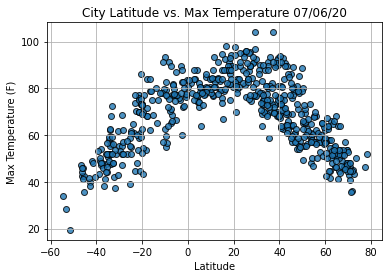

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

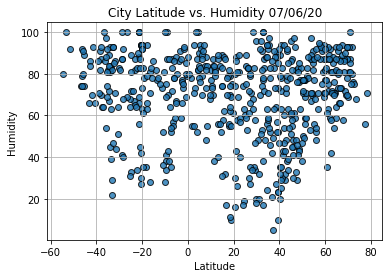

In [23]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

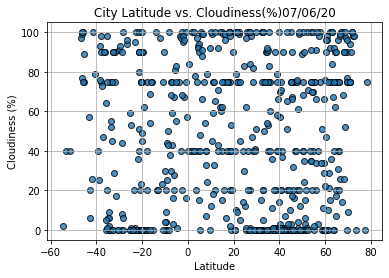

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

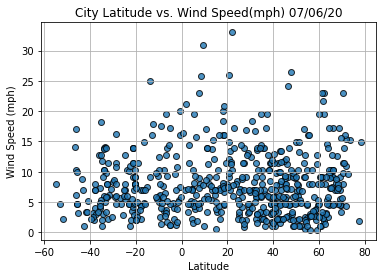

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()